In [1]:
import numpy as np
import scipy
import sklearn
import pickle
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline 
print('Finished successfully loading packages')

Finished successfully loading packages


In [2]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import pandas as pd
import copy
# Load data:
data = np.genfromtxt('housingUnits.csv', delimiter=',')
data = data[1:,:]
print(data.shape)

(20640, 8)


The first row (column titles) is discarded.

Calculate R^2 values of using variable 4 or 5 to predict the median house prices via a simple linear regression model.The results show why they are inappropriate.

0.0006076066693256887
0.0043352546340906795


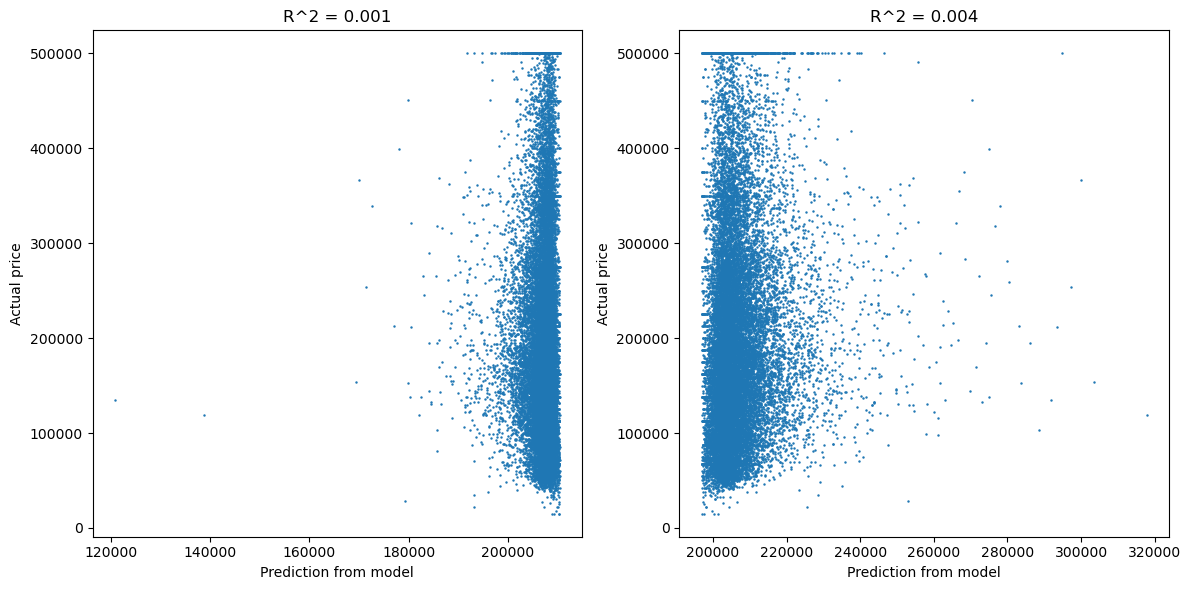

In [3]:
x4=data[:,3] #population
x5=data[:,4] #households
y=data[:,7] 

model = LinearRegression().fit(x4.reshape(-1,1),y.reshape(-1,1))
rSqr = model.score(x4.reshape(-1,1),y.reshape(-1,1))
print(rSqr)
fig = plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
yHat = model.predict(x4.reshape(-1,1))
plt.plot(yHat,y,'o',markersize=.75) 
plt.xlabel('Prediction from model') 
plt.ylabel('Actual price')  
plt.title('R^2 = {:.3f}'.format(rSqr))
plt.tight_layout()

model = LinearRegression().fit(x5.reshape(-1,1),y.reshape(-1,1))
rSqr = model.score(x5.reshape(-1,1),y.reshape(-1,1))
print(rSqr)
plt.subplot(1,2,2)
yHat = model.predict(x5.reshape(-1,1))
plt.plot(yHat,y,'o',markersize=.75) 
plt.xlabel('Prediction from model') 
plt.ylabel('Actual price')  
plt.title('R^2 = {:.3f}'.format(rSqr))
plt.tight_layout()

Compare R^2 values in simple linear regression using total rooms to predict median house price: x2p is from normalizaing total rooms x2 via dividing it by population x4, and x2h is through dividing x2 by households x5, y is median house prices

0.043882695338919864
0.023088282755354128


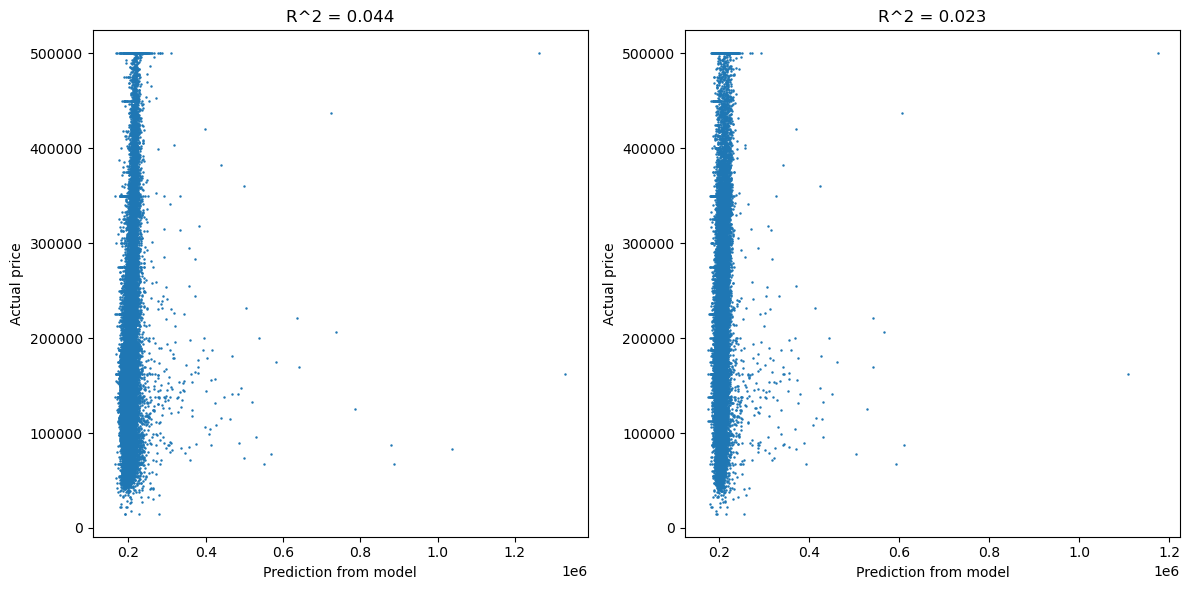

In [4]:
x2p=data[:,1]/x4 #normalize by population
x2h=data[:,1]/x5 #normalize by households

model = LinearRegression().fit(x2p.reshape(-1,1),y.reshape(-1,1))
rSqr = model.score(x2p.reshape(-1,1),y.reshape(-1,1))
print(rSqr)
fig = plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
yHat = model.predict(x2p.reshape(-1,1))
plt.plot(yHat,y,'o',markersize=.75) 
plt.xlabel('Prediction from model') 
plt.ylabel('Actual price')  
plt.title('R^2 = {:.3f}'.format(rSqr))
plt.tight_layout()

model1 = LinearRegression().fit(x2h.reshape(-1,1),y.reshape(-1,1))
rSqr = model1.score(x2h.reshape(-1,1),y.reshape(-1,1))
print(rSqr)
plt.subplot(1,2,2)
yHat = model1.predict(x2h.reshape(-1,1))
plt.plot(yHat,y,'o',markersize=.75) 
plt.xlabel('Prediction from model') 
plt.ylabel('Actual price')  
plt.title('R^2 = {:.3f}'.format(rSqr))
plt.tight_layout()

Same process for normalizaing total bedrooms x3: x3p through dividing by population and x3h through dividing by households

0.012790501296178869
0.003394278159693398


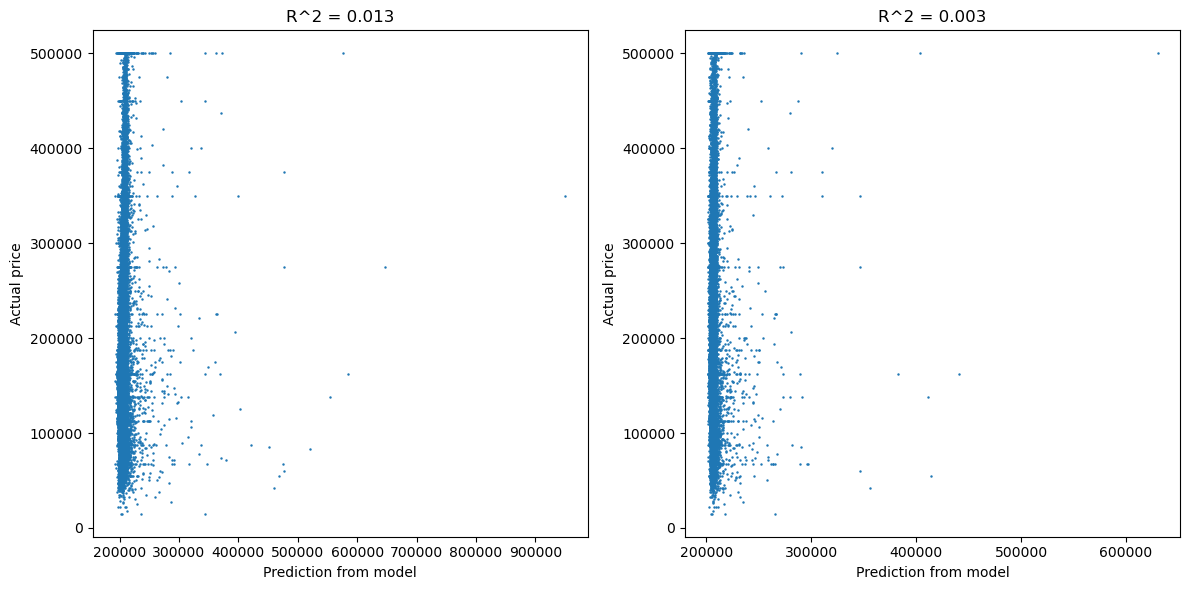

In [5]:
x3p=data[:,2]/x4
x3h=data[:,2]/x5
model = LinearRegression().fit(x3p.reshape(-1,1),y.reshape(-1,1))
rSqr = model.score(x3p.reshape(-1,1),y.reshape(-1,1))
print(rSqr)
fig = plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
yHat = model.predict(x3p.reshape(-1,1))
plt.plot(yHat,y,'o',markersize=.75) 
plt.xlabel('Prediction from model') 
plt.ylabel('Actual price')  
plt.title('R^2 = {:.3f}'.format(rSqr))
plt.tight_layout()

model = LinearRegression().fit(x3h.reshape(-1,1),y.reshape(-1,1))
rSqr = model.score(x3h.reshape(-1,1),y.reshape(-1,1))
print(rSqr)
plt.subplot(1,2,2)
yHat = model.predict(x3h.reshape(-1,1))
plt.plot(yHat,y,'o',markersize=.75) 
plt.xlabel('Prediction from model') 
plt.ylabel('Actual price')  
plt.title('R^2 = {:.3f}'.format(rSqr))
plt.tight_layout()

In both cases dividing by population yields a higher R^2, but dividing by households is more resonable.

Now draw the scatterplot after normalizaing

array([[<Axes: xlabel='0', ylabel='0'>, <Axes: xlabel='1', ylabel='0'>,
        <Axes: xlabel='2', ylabel='0'>, <Axes: xlabel='3', ylabel='0'>,
        <Axes: xlabel='4', ylabel='0'>, <Axes: xlabel='5', ylabel='0'>,
        <Axes: xlabel='6', ylabel='0'>, <Axes: xlabel='7', ylabel='0'>],
       [<Axes: xlabel='0', ylabel='1'>, <Axes: xlabel='1', ylabel='1'>,
        <Axes: xlabel='2', ylabel='1'>, <Axes: xlabel='3', ylabel='1'>,
        <Axes: xlabel='4', ylabel='1'>, <Axes: xlabel='5', ylabel='1'>,
        <Axes: xlabel='6', ylabel='1'>, <Axes: xlabel='7', ylabel='1'>],
       [<Axes: xlabel='0', ylabel='2'>, <Axes: xlabel='1', ylabel='2'>,
        <Axes: xlabel='2', ylabel='2'>, <Axes: xlabel='3', ylabel='2'>,
        <Axes: xlabel='4', ylabel='2'>, <Axes: xlabel='5', ylabel='2'>,
        <Axes: xlabel='6', ylabel='2'>, <Axes: xlabel='7', ylabel='2'>],
       [<Axes: xlabel='0', ylabel='3'>, <Axes: xlabel='1', ylabel='3'>,
        <Axes: xlabel='2', ylabel='3'>, <Axes: xlabel='3', yl

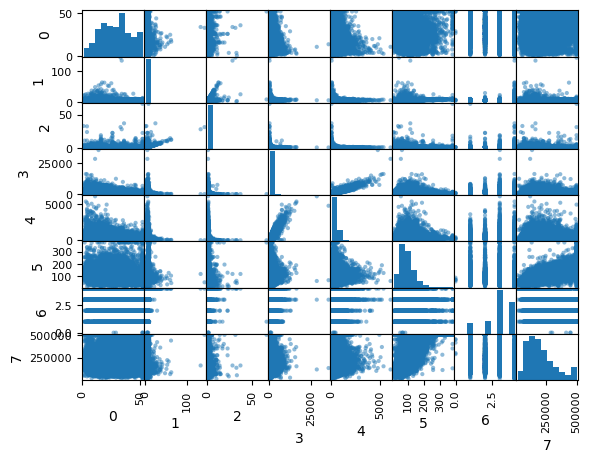

In [6]:
data[:,1]=data[:,1]/data[:,4]
data[:,2]=data[:,2]/data[:,4]
df = pd.DataFrame(data)
pd.plotting.scatter_matrix(df)

Now calculate the R^2 of all other variables that are not covered in the processes above.

In [7]:
model = LinearRegression().fit(data[:,0].reshape(-1,1),y.reshape(-1,1))
rSqr = model.score(data[:,0].reshape(-1,1),y.reshape(-1,1))
print(rSqr)

0.011156305266710742


In [8]:
model = LinearRegression().fit(data[:,5].reshape(-1,1),y.reshape(-1,1))
rSqr = model.score(data[:,5].reshape(-1,1),y.reshape(-1,1))
print(rSqr)

0.47344749180719903


In [9]:
model = LinearRegression().fit(data[:,6].reshape(-1,1),y.reshape(-1,1))
rSqr = model.score(data[:,6].reshape(-1,1),y.reshape(-1,1))
print(rSqr)

0.15780848616855125


Now do the multiple linear regression that contains all predictors.

In [10]:
model = LinearRegression().fit(data[:,0:7],y)
rSqr = model.score(data[:,0:7],y)
print(rSqr)

0.599162410783781


Use correlation value to check for collinearity between variables 2 and 3 and between variables 4 and 5. 

0.5187238864208916
0.9072222660959619


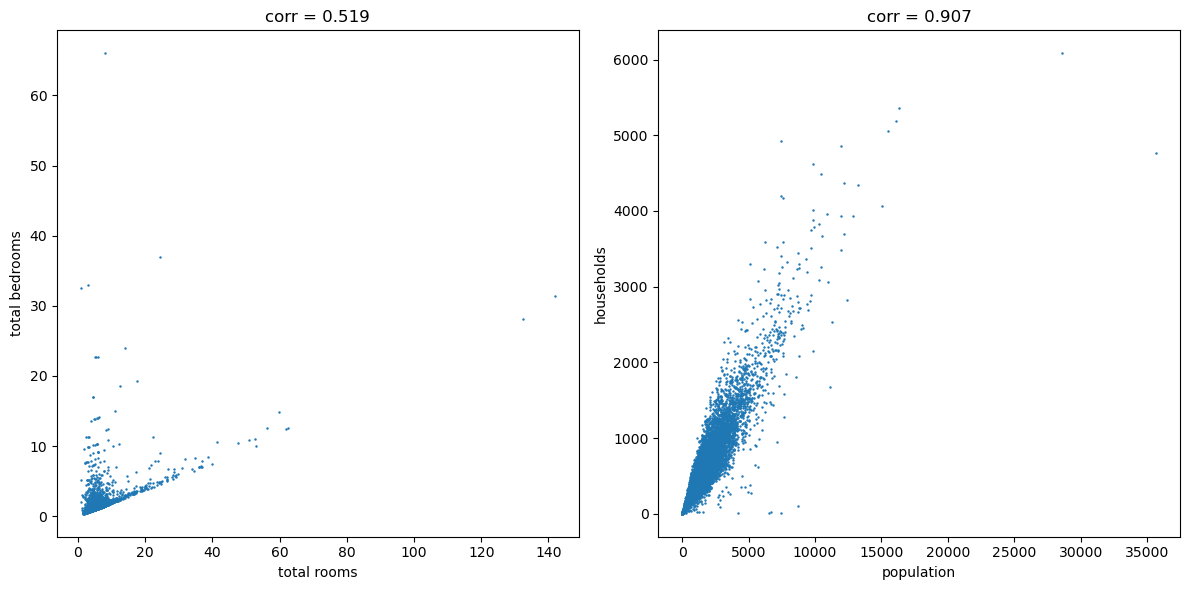

In [7]:
corr = np.corrcoef(data[:,1], data[:,2])[1,0]
print(corr)
corr1 = np.corrcoef(data[:,3], data[:,4])[1,0]
print(corr1)

fig = plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(data[:,1],data[:,2],'o',markersize=.75) 
plt.xlabel('total rooms') 
plt.ylabel('total bedrooms')  
plt.title('corr = {:.3f}'.format(corr))
plt.tight_layout()

plt.subplot(1,2,2)
plt.plot(data[:,3],data[:,4],'o',markersize=.75) 
plt.xlabel('population') 
plt.ylabel('households')  
plt.title('corr = {:.3f}'.format(corr1))
plt.tight_layout()